In [6]:
library(tidyverse)
library(readxl)
library(hash)


In [7]:
modify_patient_id <- function(string){
    splitted_str  <- str_split_1(string)
    if (length(splitted_str) == 3)
    {
        return(paste(splitted_str[1:2], sep="-"))
    } else
    {
        return(paste(splitted_str, sep="-"))
    }
}

In [8]:
data_df <- read_csv("data/dengue/small_transcriptome/denv.csv", show_col_types = FALSE)
data_df <- data_df %>%
    t() %>%
    as.data.frame() %>%
    mutate(parameter = rownames(.)) %>%
    `rownames<-`(NULL)

colnames(data_df)           <- data_df[1, ]
data_df                     <- data_df[-1, ]
data_disease_df             <- data_df[, c("Sample_title", "diagnosis")]
data_disease_df[ , 3:4]     <- str_split_fixed(data_disease_df$diagnosis, ": ", 2)
data_disease_df             <- data_disease_df[, c("Sample_title", "V4")]

colnames(data_disease_df)   <- c("patient_ID", "diagnosis")
data_disease_df[ , 3:5]     <- str_split_fixed(data_disease_df$patient_ID, "-", 3)
data_disease_df             <- data_disease_df[, c("patient_ID", "diagnosis",	"V3",	"V4")]
data_disease_df$patient_ID2 <- paste(data_disease_df$V3, data_disease_df$V4, sep="-")


data_disease_df             <- data_disease_df[, c("patient_ID2", "diagnosis")]
colnames(data_disease_df)   <- c("patient_ID", "diagnosis")



In [9]:
data_disease_df

,patient_ID,diagnosis
,<chr>,<chr>
2,1-001,DSS
3,1-001,DSS
4,1-001,DSS
5,1-001,DSS
6,1-002,DSS
7,1-002,DSS
8,1-002,DSS
9,1-003,DF
10,1-003,DF


In [24]:
gene_exp_df <- read_excel("data/dengue/small_transcriptome/denv_pcr.xlsx")
gene_exp_df[ , 8:10]    <- str_split_fixed(gene_exp_df$patient_ID, "-", 3)
gene_exp_df             <- gene_exp_df[, c("patient_ID", "mRNA", "Value", "diagnosis",	"V3",	"V4")]

gene_exp_df$patient_ID2 <- paste(gene_exp_df$V3, gene_exp_df$V4, sep="-")

gene_exp_df

patient_ID,plate_ID,mRNA,Value,Quality,Call,Threshold,V1,V2,V3
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1-010,S16-A04,PTPRM,20.81748,0.9253333,Pass,0.004331215,1,010,
1-010,S16-A01,AAK1,17.74818,0.7953206,Pass,0.001502300,1,010,
1-010,S16-A02,BMP2K,17.29439,0.7982793,Pass,0.003787858,1,010,
1-010,S16-A03,ENPP5,29.12995,0.6620165,Pass,0.001879606,1,010,
1-010,S16-A08,C3orf18,22.48981,0.7675803,Pass,0.003659375,1,010,
1-010,S16-A05,ACTB,11.23963,0.6531736,Pass,0.003140819,1,010,
1-010,S16-A06,EMPTY,40.00000,0.0000000,No Call,0.000734752,1,010,
1-010,S16-A07,ABI3,18.52086,0.6583401,Pass,0.001093014,1,010,
1-010,S16-A12,EMPTY,40.00000,0.0000000,No Call,0.000734752,1,010,


In [ ]:
gene_exp_df |> filter(!(patient_ID %in% "3-004-01"))   -> gene_exp_df
merge(gene_exp_df, data_disease_df, by = "patient_ID") -> merged_df

merged_df |> filter(!(diagnosis %in% "exclude")) -> merged_df


In [21]:
gene_exp_df# |> filter((patient_ID %in% "3-005"))

patient_ID,plate_ID,mRNA,Value,Quality,Call,Threshold
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1-010,S16-A04,PTPRM,20.81748,0.9253333,Pass,0.004331215
1-010,S16-A01,AAK1,17.74818,0.7953206,Pass,0.001502300
1-010,S16-A02,BMP2K,17.29439,0.7982793,Pass,0.003787858
1-010,S16-A03,ENPP5,29.12995,0.6620165,Pass,0.001879606
1-010,S16-A08,C3orf18,22.48981,0.7675803,Pass,0.003659375
1-010,S16-A05,ACTB,11.23963,0.6531736,Pass,0.003140819
1-010,S16-A06,EMPTY,40.00000,0.0000000,No Call,0.000734752
1-010,S16-A07,ABI3,18.52086,0.6583401,Pass,0.001093014
1-010,S16-A12,EMPTY,40.00000,0.0000000,No Call,0.000734752


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


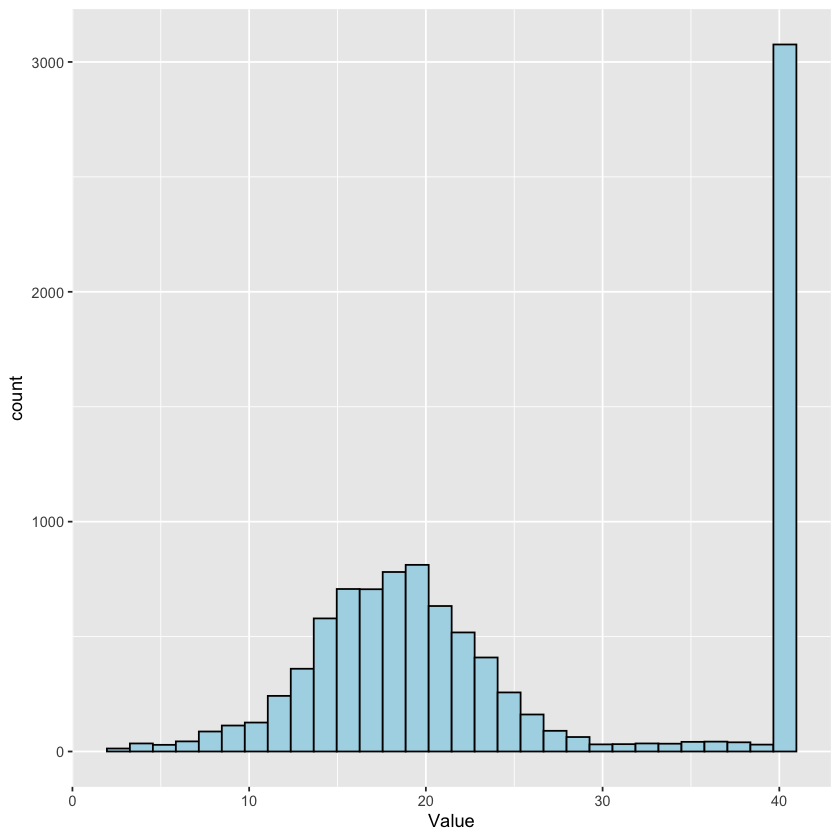

In [17]:
library(ggplot2)

# Change colors
p <- ggplot(gene_exp_df, aes(x=Value)) + geom_histogram(color="black", fill="lightblue")
p

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


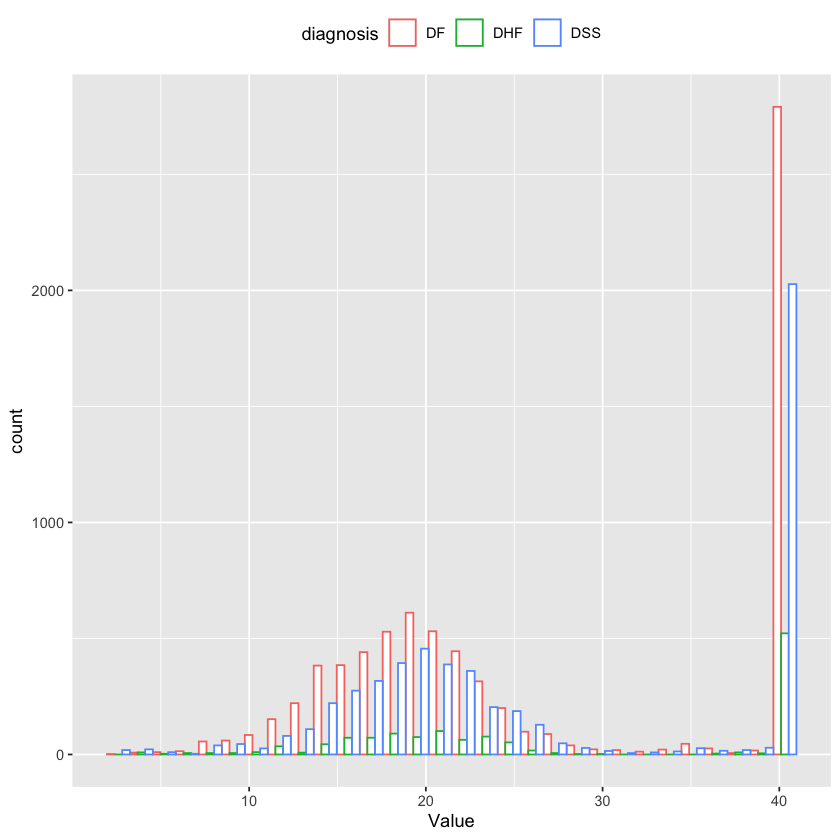

In [18]:
# Change colors
p <- ggplot(merged_df, aes(x=Value, color=diagnosis)) + geom_histogram(fill="white", position="dodge") +
            theme(legend.position="top")
p

In [13]:
merged_df


patient_ID,plate_ID,mRNA,Value,Quality,Call,Threshold,diagnosis
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1-001,S07-A02,BMP2K,13.73141,0.9425785,Pass,0.003787858,DSS
1-001,S07-A02,BMP2K,13.73141,0.9425785,Pass,0.003787858,DSS
1-001,S07-A02,BMP2K,13.73141,0.9425785,Pass,0.003787858,DSS
1-001,S07-A02,BMP2K,13.73141,0.9425785,Pass,0.003787858,DSS
1-001,S03-A45,NCR3,24.62701,0.2007100,Pass,0.002273239,DSS
1-001,S03-A45,NCR3,24.62701,0.2007100,Pass,0.002273239,DSS
1-001,S03-A45,NCR3,24.62701,0.2007100,Pass,0.002273239,DSS
1-001,S03-A45,NCR3,24.62701,0.2007100,Pass,0.002273239,DSS
1-001,S03-A46,TRERF1,21.55679,0.9415901,Pass,0.002273239,DSS


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


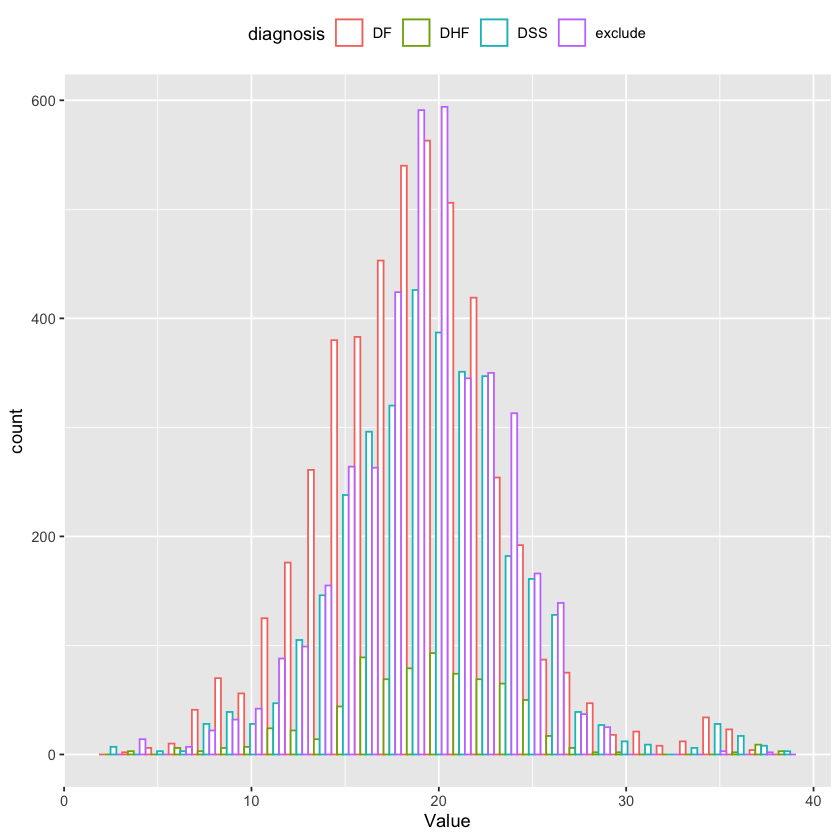

In [15]:
merged_df |> filter((Quality > 0)) -> merged_df

# Change colors
p <- ggplot(merged_df, aes(x=Value, color=diagnosis)) + geom_histogram(fill="white", position="dodge") +
            theme(legend.position="top")
p